<a href="https://colab.research.google.com/github/swamyappu/Assignment-8/blob/main/Assignment_8_AlexNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [39]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

In [40]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [41]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 2, 2, 60)         0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_80 (Conv2D)          (None, 2, 2, 30)        

In [56]:
history1 = AlexNet.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test),verbose=1)

Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2956 - accuracy: 0.1470 - val_loss: 2.2748 - val_accuracy: 0.1818
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1504 - accuracy: 0.1853 - val_loss: 2.0695 - val_accuracy: 0.2030
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0307 - accuracy: 0.2095 - val_loss: 1.9472 - val_accuracy: 0.2454
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9052 - accuracy: 0.2556 - val_loss: 1.8939 - val_accuracy: 0.2734
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7702 - accuracy: 0.3131 - val_loss: 1.7121 - val_accuracy: 0.3544
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6836 - accuracy: 0.3610 - val_loss: 1.6166 - val_accuracy: 0.3869
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6178 - accuracy: 0.3869 - val_loss: 1.6440 - val_accuracy

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= AlexNet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

313/313 [==============================] - 1s 3ms/step
Test accuracy by AlexNet: 0.5435


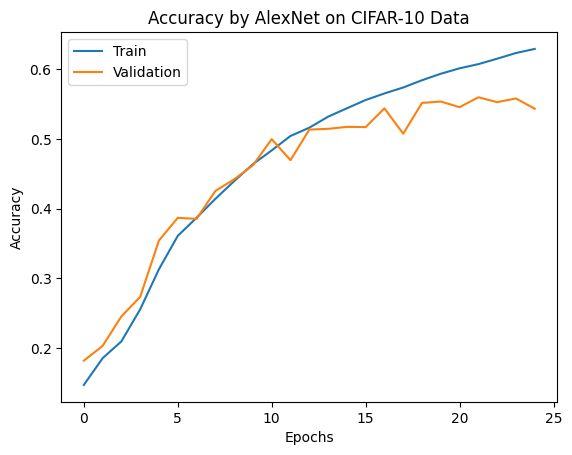

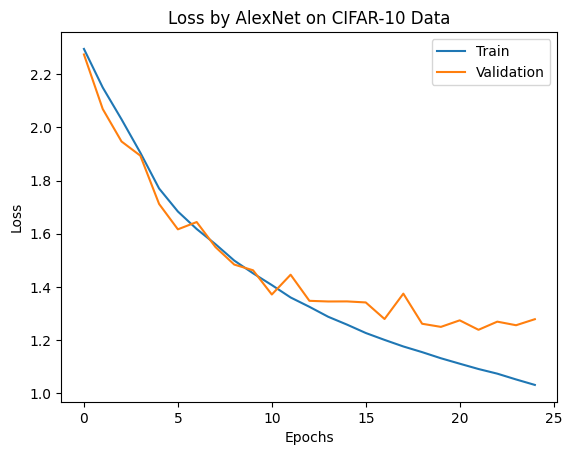

In [58]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [60]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[541,  23, 104,  32,  19,  11,  24,  28, 175,  43],
       [ 29, 591,   7,  27,   8,   4,  40,  13, 111, 170],
       [ 54,   1, 426,  92, 118,  72, 154,  39,  33,  11],
       [ 17,  10,  75, 409,  50, 166, 202,  26,  23,  22],
       [ 21,   3, 124,  67, 387,  40, 265,  66,  24,   3],
       [  5,   6,  63, 304,  71, 386, 102,  45,  10,   8],
       [  5,  10,  26,  73,  47,   7, 817,   5,   4,   6],
       [ 22,   9,  43,  76, 118,  94,  47, 552,   7,  32],
       [ 60,  30,  29,  34,  14,   3,  23,   4, 759,  44],
       [ 39, 140,  13,  45,   8,   9,  50,  31,  98, 567]])

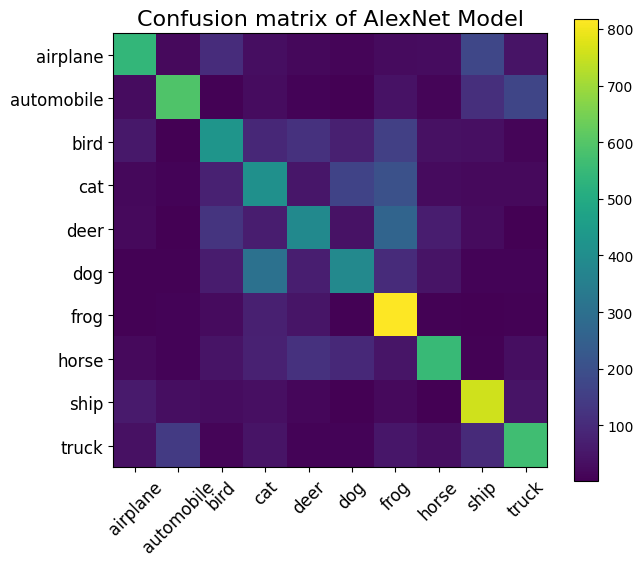

In [61]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

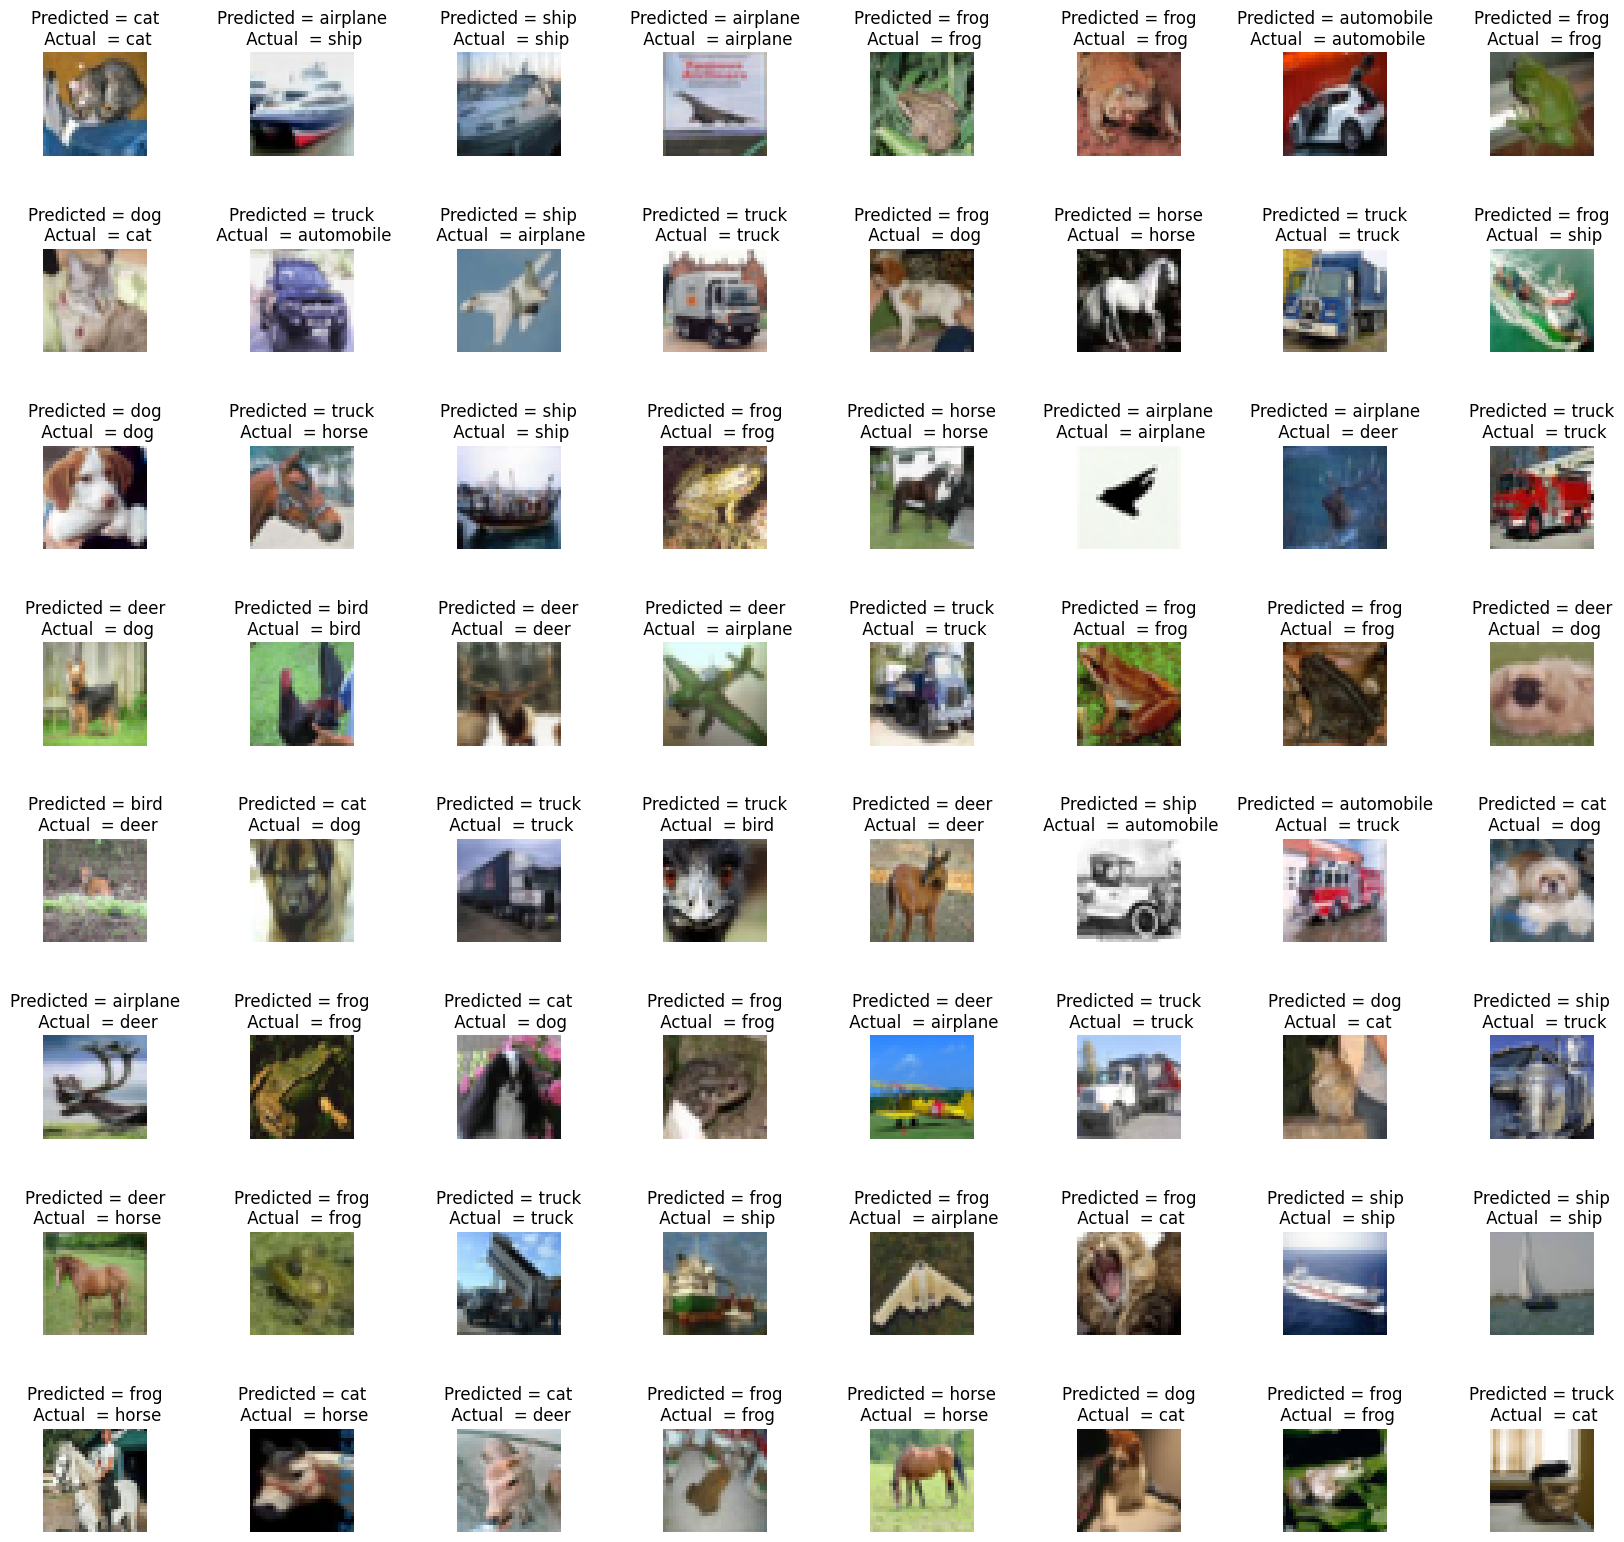

In [62]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)